In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("/content/Hitters.csv")
df.dropna(inplace=True)
df = df._get_numeric_data()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


We aimed to represent our dataset with lesser variables.We currently have almost 15 variables (AtBat,Hits...).We are trying to reduce the variables that can effectively represent our dataset


In [6]:
#Standardization

from sklearn.preprocessing import StandardScaler
df = StandardScaler().fit_transform(df)
df

array([[-0.6029005 , -0.59567545, -0.5285512 , ..., -0.52319133,
         0.21335208, -0.1353126 ],
       [ 0.51254171,  0.49225957,  0.72996619, ..., -0.25386267,
         0.81996395, -0.12420791],
       [ 0.62816682,  0.73648988,  0.95878753, ..., -0.74417894,
        -0.84821868, -0.07978915],
       ...,
       [ 0.48533581,  0.40344855, -0.98619389, ..., -0.03978092,
        -0.24160682, -0.33519701],
       [ 1.15188054,  0.80309815, -0.29972986, ...,  0.08452461,
         0.51665801,  0.94184228],
       [ 1.54636621,  1.38036979, -0.29972986, ..., -0.79251998,
        -0.84821868,  1.0306798 ]])

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)   #We want to reduce to 2 copmponents
pca_fit = pca.fit_transform(df)

In [8]:
component_df = pd.DataFrame(data=pca_fit,columns=["1.Component","2.Component"])
component_df

,1.Component,2.Component
0,0.076848,1.653525
1,0.337127,-2.320560
2,3.408362,0.755757
3,-2.642221,-0.361486
4,1.071681,-1.511674
...,...,...
258,-0.152111,-0.331665
259,3.241373,-0.391942
260,-1.206322,-0.625714
261,2.084856,-2.059851


In [10]:
pca.explained_variance_ratio_ 
 # That mean by 1. Component;Dataset's %45  was able to be explained and by 2.Component:Dataset's %24  was able to be explained
 # What that means is that we can explain our dataset's almost %70 by only these 2 components.It's a good value

array([0.45245466, 0.24246801])

In [12]:
pca.components_ # Our 2 components

array([[ 0.19506377,  0.19410007,  0.19690453,  0.19491272,  0.22956638,
         0.20673717,  0.271085  ,  0.31970454,  0.32077315,  0.30810145,
         0.32761493,  0.32977446,  0.30573146,  0.08303783,  0.00159189,
        -0.00529271,  0.24914187],
       [-0.38407792, -0.37764493, -0.22866298, -0.37459128, -0.31026531,
        -0.23115759,  0.26820405,  0.19641268,  0.18589726,  0.13386448,
         0.17692929,  0.17283361,  0.19698297, -0.16295204, -0.17624626,
        -0.20978299, -0.05452611]])

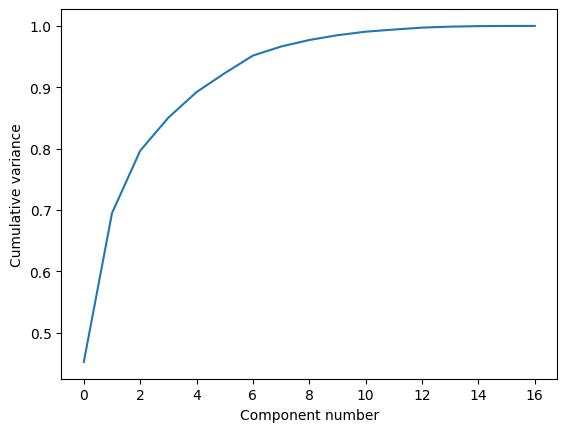

In [16]:
#Optimum component number
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Component number")
plt.ylabel("Cumulative variance") 
plt.show()

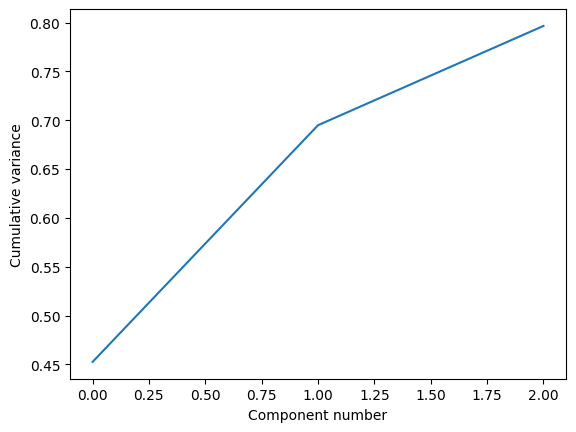

In [17]:
#FINAL (OPTIMISED) MODEL

pca = PCA(n_components=3).fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Component number")
plt.ylabel("Cumulative variance") 
plt.show()